In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## 1. Reading and exploring the data

In [232]:
data_pd=pd.read_csv('./data/epi_r.csv')

In [233]:
#Deleting null predictive variables from the dataset
data_pd=data_pd.loc[(data_pd.rating>0) & (~data_pd.rating.isna())]
data_pd.shape

(18216, 680)

In [234]:
#Deleting drinks
data_pd=data_pd.loc[(data_pd.drink==0) & (data_pd.drinks==0) & (data_pd.cocktail==0)]

data_pd.head()
data_pd.shape

(17596, 680)

### FAT CLEANING

In [235]:
from sklearn.impute import SimpleImputer

#FAT: In grams but it can mislead depending of the number of portions (Paella for example)

#Delete bigger portions(Paella) and outliers
data_pd=data_pd.loc[((data_pd.fat>=0) & (data_pd.fat<=200)) | (data_pd.fat.isna())]

#checking nulls: over 20% (3.4k records)
fat_nulls=data_pd.loc[(data_pd.fat.isna())]
fat_nulls.shape[0]/data_pd.shape[0]

#Median imputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
fat_clean = imp.fit_transform(data_pd.fat.values.reshape(-1,1))
fat_clean = pd.DataFrame(data=fat_clean ,columns=['fat_clean'])
data_pd['fat_clean']=fat_clean.fat_clean.values
#data_pd['fat']=fat_clean.fat_clean.values


In [236]:
data_pd.shape

(17440, 681)

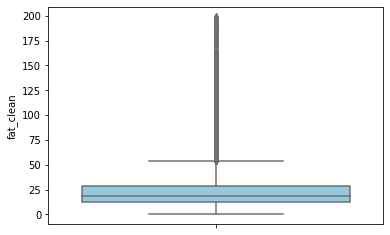

In [237]:
sns.boxplot(y='fat_clean',data=data_pd, color="skyblue")
# sns.distplot(data_pd.fat_clean.values, bins=20)

# data_pd.loc[data_pd.fat_clean>200,'fat_clean']=100
# data_pd.loc[data_pd.fat==0]  #Birthday Party Paella
# data_pd.head(100).sort_values('fat_clean', ascending=False)

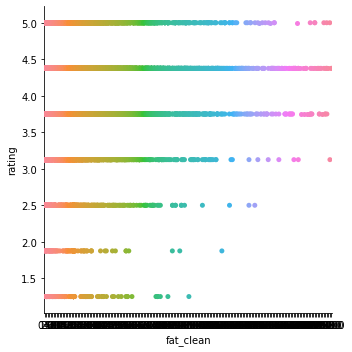

In [238]:
sns.catplot(x="fat_clean", y="rating", data=data_pd);

### PROTEIN

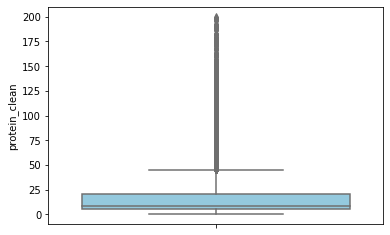

In [243]:
### PROTEIN CLEANING
#Again, considering values lower than 200: deleting 62 rows...
data_pd=data_pd.loc[((data_pd.protein>=0) & (data_pd.protein<=200)) | (data_pd.protein.isna())]

#checking nulls: over 20% (3.4k records)
nulls=data_pd.loc[(data_pd.protein.isna())]
nulls.shape[0]/data_pd.shape[0]

#Median imputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
protein_clean = imp.fit_transform(data_pd.protein.values.reshape(-1,1))
protein_clean = pd.DataFrame(data=protein_clean ,columns=['protein_clean'])
data_pd['protein_clean']=protein_clean.protein_clean.values

sns.boxplot(y='protein_clean',data=data_pd, color="skyblue")

#sns.boxplot(y='protein',data=data_pd.loc[data_pd.protein<=200], color="skyblue")

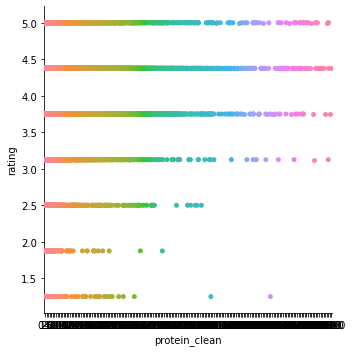

In [244]:
sns.catplot(x="protein_clean", y="rating", data=data_pd.loc[data_pd.protein<=200])

### SODIUM

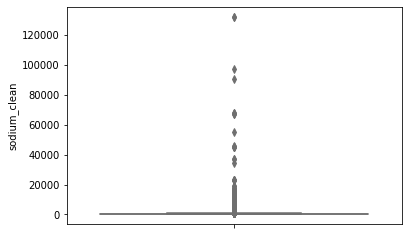

In [265]:
#miligrams
#Very different values, so we will impute only:

#checking nulls: over 20% (3.4k records)
nulls=data_pd.loc[(data_pd.sodium.isna())]
nulls.shape[0]/data_pd.shape[0]

imp = SimpleImputer(missing_values=np.nan, strategy='median')
sodium_clean = imp.fit_transform(data_pd.sodium.values.reshape(-1,1))
sodium_clean = pd.DataFrame(data=sodium_clean ,columns=['sodium_clean'])
data_pd['sodium_clean']=sodium_clean.sodium_clean.values


sns.boxplot(y='sodium_clean',data=data_pd, color="skyblue")


KeyboardInterrupt: 

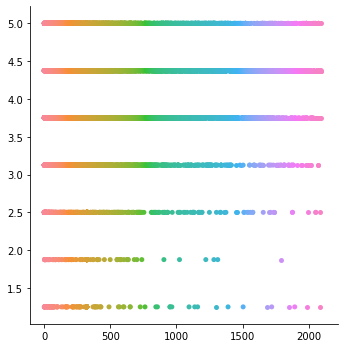

In [274]:
sns.catplot(x="sodium_clean", y="rating", data=data_pd)

In [266]:
data_pd.shape

(17378, 683)

## 22-MINUTE

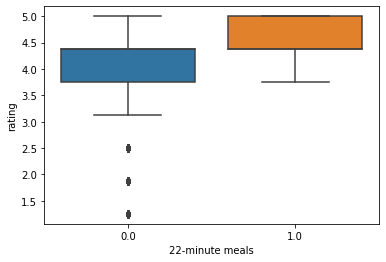

In [270]:
#There is no nulls
#String relationship between cooking time and rating!
sns.boxplot(x="22-minute meals", y="rating",  data=data_pd)

In [275]:
# nulls=data_pd.loc[(data_pd["22-minute meals"].isna())]
# perc_nulls=nulls.shape[0]/data_pd.shape[0]
# nulls

data_pd.shape


(17378, 683)